# YOLO v2
![alt text](https://pjreddie.com/media/image/model2.png)

(Bu resim orjinal yolov2 sayfasından alınmıştır(https://pjreddie.com/darknet/yolov2/))

Model hakkında daha çok bilgi için linkteki makaleye ulaşabilirsiniz. (https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)

# Hazırlık
sony/nnable-examples repo ile çalışma yapılacağı için repoyu indirilir

In [ ]:
!pip install nnabla-ext-cuda100
!git clone https://github.com/sony/nnabla-examples.git
%run nnabla-examples/interactive-demos/colab_utils.py
%cd nnabla-examples/object-detection/yolov2

     |████████████████████████████████| 43.2MB 67kB/s 
     |████████████████████████████████| 18.2MB 149kB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
     |████████████████████████████████| 7.6MB 40.7MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
ERROR: botocore 1.20.84 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
Cloning into 'nnabla-examples'...
remote: Enumerating objects: 4868, done.
remote: Counting objects: 100% (633/633), done.
remote: Compressing objects: 100% (395/395), done.
remote: Total 4868 (delta 296), reused 480 (delta 227), pack-reused 4235
Receiving objects: 100% (4868/4868), 173.01 MiB | 32.04 MiB/s, done.
Resolving deltas: 100% (2504/2504), done.
/content/nnabla-examples/object-detection/yolov2


Ayrıca önceden eğitilmiş ağırlık parametreleri ve yardımcı dosyayı da inidirilmelidri. NNabla ile uyumlu hale getirmek için ağırlık parametreleri de .h5 formatına dönüştürülmelidir. Bu bir kaç dakika alabilir.

In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!python convert_yolov2_weights_to_nnabla.py --input yolov2.weights

--2021-05-31 21:43:02--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  58.8MB/s    in 3.2s    

2021-05-31 21:43:05 (59.9 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]

--2021-05-31 21:43:05--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2021-0



```
# Bu, kod olarak biçimlendirilmiştir
```

# Görseller yüklenşr
Bilgisayar üzerinden resminizi yüklemek için aşağıdaki hücre çalıştırılır.



In [ ]:
from google.colab import files

input = files.upload()

Saving dunya-kopek-gunu.jpg to dunya-kopek-gunu.jpg


Kolaylık olması için resmi yeniden adlandırılır


In [ ]:
import os
ext = os.path.splitext(list(img.keys())[-1])[-1]
os.rename(list(img.keys())[-1],
          "input_image{}".format(ext)) 
input_img = "input_image" + ext

FileNotFoundError: ignored

# Nesne Tespiti
Şimdi görüntünüze YOLO v2'yi çalıştıralım ve nesne algılamayı nasıl gerçekleştirdiğini görelim!

2021-05-31 21:50:12,425 [nnabla][INFO]: Initializing CPU extension...
2021-05-31 21:50:14,377 [nnabla][INFO]: Initializing CUDA extension...
2021-05-31 21:50:14,440 [nnabla][INFO]: Initializing cuDNN extension...
forward
done
[INFO] dog: 55.63%
Processing time: 31.1 [ms/image]
Input:


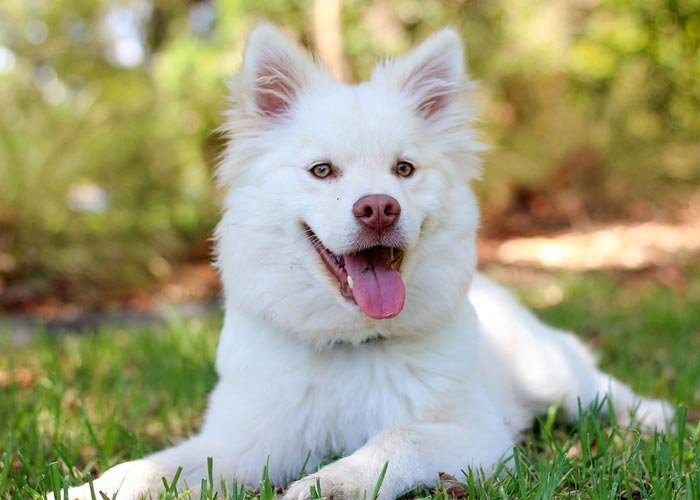

Output:


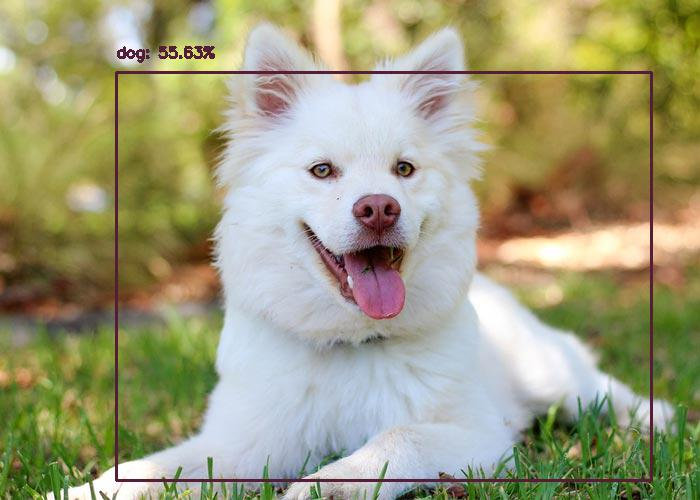

In [ ]:
!python yolov2_detection.py $input_img
from IPython.display import Image,display
print('Input:')
display(Image(input_img))
output_img = "detect.input_image"+ext
print('Output:')
display(Image(output_img))

[bağlantı metni](https://)# Akıllı Telefon Kullanıcıları için
Kameralı bir akıllı telefon kullanıyorsanız, bu demo için bir fotoğraf çekebilir ve bu görüntüyü kullanabilirsiniz.
Sadece aşağıdaki hücreyi yürütün ve "Yakala" düğmesine dokunun.

Cihazınızda birden fazla kamera varsa (ön ve arka gibi), ilgili düğmeye ('Yakala' düğmesinin yanında görünmelidir) dokunarak hangisini kullanacağınızı seçmeniz gerekir.

**Bunun deneysel bir destek olduğunu ve bazı cihazlarda çalışmayabileceğini unutmayın.**

Ancak bilgisayardan da deneyebilirsiniz


<IPython.core.display.Javascript object>

Saved to photo.png


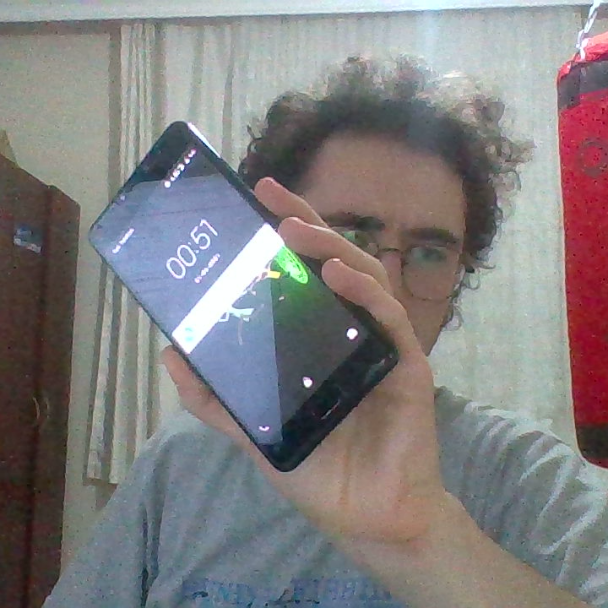

In [ ]:
try:
    filename = take_photo(cam_width=608, cam_height=608)
    print('Saved to {}'.format(filename))
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

Fotoğrafta sorun yoksa nesne algılamayı deneyelim. Başka bir fotoğraf kullanmak istiyorsanız, önceki hücreyi yeniden çalıştırmanız yeterlidir.

Aşağıdaki hücre, fotoğrafınızda nesne algılamayı yürütecektir.

2021-05-31 21:51:29,264 [nnabla][INFO]: Initializing CPU extension...
2021-05-31 21:51:29,779 [nnabla][INFO]: Initializing CUDA extension...
2021-05-31 21:51:29,810 [nnabla][INFO]: Initializing cuDNN extension...
forward
done
[INFO] book: 54.35%
Processing time: 30.7 [ms/image]
Output:


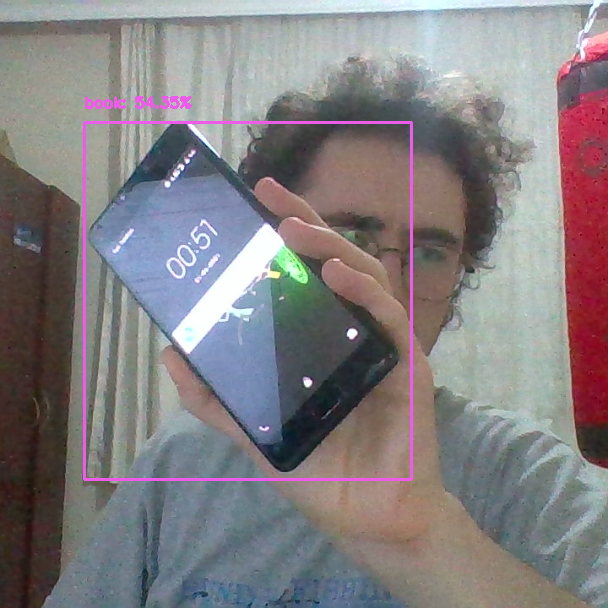

In [ ]:
!python yolov2_detection.py photo.png --output photo_output.png
from IPython.display import Image,display
print('Output:')
display(Image('photo_output.png'))